In [18]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')

PROJECT_PATH = Path('/project/greencenter/Toprak_lab/shared/marinelle-barcoding-project')

In [3]:
counts = pd.read_csv(PROJECT_PATH / 'dump/genewiz_initial_barcodes/barcode-counts/MR-P7-BCint-N1.counts' , sep='\t', names=['barcode', 'count'])
counts

,barcode,count
0,AAGGTTACTTA,5446
1,AATGGCACAAT,4427
2,ATGGCCACGGT,4057
3,ATTGTTTCT__,2832
4,ACCGAATCTTG,2368
...,...,...
6528,ATCGCTTCCCT,1
6529,ACACTAGCCAC,1
6530,AATATTTTTAG,1
6531,AACAACTCGGG,1


In [4]:
def shannon_index(vect):
    vect = vect[vect>0]
    return -sum([x*np.log(x) for x in vect])

total_read_count = sum(counts['count'].values)
shannon_index(counts['count'].values/total_read_count)

6.821990970513461

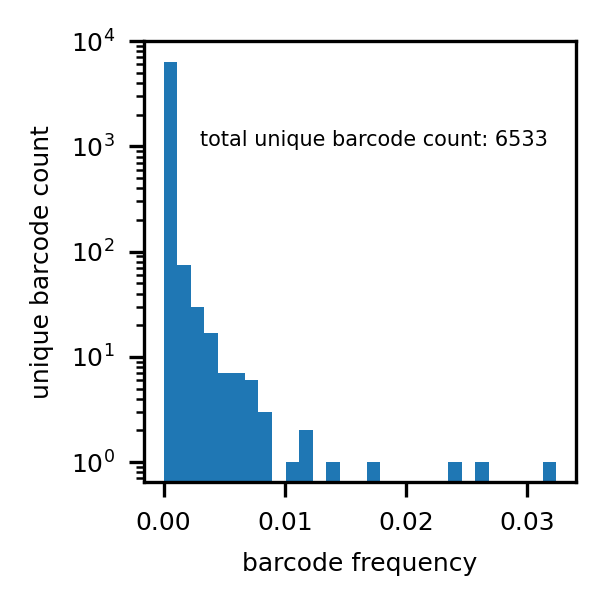

In [21]:
# add text total number of unique barcodes
mpl.rc('font', size=6)
fig, ax = plt.subplots(1,1, figsize=(2,2), dpi=300)
ax.hist(counts['count'].values/total_read_count, bins=29);
ax.set_yscale('log')
ax.set_xticks([0,0.01,0.02,0.03])
ax.set_yticks(np.logspace(0,4,5,base=10))
ax.set_ylabel('unique barcode count')
ax.set_xlabel('barcode frequency')
ax.text(0.003,1e3, 'total unique barcode count: %d'%counts.shape[0], fontsize=5)
plt.tight_layout()
fig.savefig('export/Ancestoral barcoded population barcode frequency histogram.png', dpi=300)